# CarResale Exploratory Data Analysis

In this project, we try to have a look into the data related to used cars and understand the relationships among various variables and try to figure out the features which have a maximum impact on price. The goal is to create a predictive model which can give an estimation of the price to a customer who wants to buy/sell a used car.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from collections import OrderedDict

Lets import the dataset and have a look at the first few records.

In [31]:
carSales = pd.read_csv('~/library/AutoData.csv',sep=",")
carSales.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [32]:
carSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


As we can see above, there are a total of 16 features. The popularity of car is a number obtained from twitter assigned to a particular Make and Model. Since, the users will not be aware of the popularity of a particular make, we should choose to ignore this feature.

In [33]:
#dropping Popularity
carSales=carSales.drop('Popularity',axis=1)

We can also create new features such as the Age of the car, which is certainly a very important characteristic that a buyer looks into while looking for a used car.

In [34]:
#This dataset is from 2017. So, using that as a reference to calculate the age of the car .
carSales['Age']=2017-carSales['Year']

In [7]:
carSales.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP,Age
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,1.191400e+04,11914.000000
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,4.059474e+04,6.615662
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,6.010910e+04,7.579740
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000e+03,0.000000
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,2.100000e+04,1.000000
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,2.999500e+04,2.000000
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,4.223125e+04,10.000000
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,2.065902e+06,27.000000


We can see above that there are a few columns which have a few blank values as the count is less than the total number of records 11914.

First, let us check the target variable MSRP

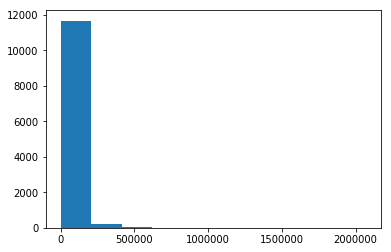

In [35]:
plt.hist(carSales['MSRP'])
plt.show()

Clearly, this is a skewed distribution. There are cars of several makes and models in this dataset. Lets have a look at the price with respect to the Make of the car.  We are choosing the Median as the Central Tendency measure instead of the Mean since the Median is more robust in nature compared to the Mean. For some models such as Mercedes Benz, there are models such as SLR McLaren which have an approximate price range of $480000. This may drive the mean towards the right of the distribution and result in us placing the Mercedes Benz in a wrong category. Hence, median is a better choice here. 

Populating the interactive namespace from numpy and matplotlib


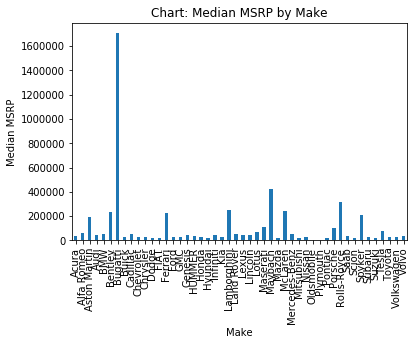

In [36]:
%pylab inline
Make=carSales.groupby(['Make'])['MSRP'].median()
Make.plot(kind='bar',stacked=True)
pylab.ylabel('Median MSRP')
pylab.title('Chart: Median MSRP by Make')
show()

From the above plot, we see that the Make of a car has a significant impact on price. This is obvious as different manufacturers produce cars in different price ranges. It might be difficult for a single model to fit well to all the data. So, it might be wise to divide the data w.r.t price and then we can have individual models for a single price range.

In [37]:
carSales=carSales.join(carSales.groupby('Make')['MSRP'].median(), on='Make', rsuffix='_Median')

In [38]:
make = carSales.groupby('Make')['MSRP'].median().reset_index()
pd.options.display.float_format = '{:.4f}'.format
make.sort_values('MSRP', ascending=False)

,Make,MSRP
6,Bugatti,1705769.0000
28,Maybach,426975.0000
38,Rolls-Royce,319400.0000
22,Lamborghini,251600.0000
30,McLaren,239400.0000
5,Bentley,231600.0000
13,Ferrari,224585.0000
41,Spyker,209990.0000
2,Aston Martin,195895.0000
27,Maserati,107400.0000


In [39]:
def map_MSRP_to_group(x):
    if x<30000:
        return 'ordinary'
    elif x<60000 :
        return 'deluxe'
    elif x<90000:
        return 'super-deluxe'
    elif x<350000:
        return 'luxury'
    else:
        return 'super-luxury'

#function to convert a series    
def convert_MSRP_series_to_MSRP_group(MSRP):
    return MSRP.apply(map_MSRP_to_group)

MSRP_group=convert_MSRP_series_to_MSRP_group(carSales['MSRP_Median'])
carSales['MSRP_group'] = MSRP_group
carSales.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP,Age,MSRP_Median,MSRP_group
0,BMW,1 Series M,2011,premium unleaded (required),335.0000,6.0000,MANUAL,rear wheel drive,2.0000,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135,6,51850.0000,deluxe
1,BMW,1 Series,2011,premium unleaded (required),300.0000,6.0000,MANUAL,rear wheel drive,2.0000,"Luxury,Performance",Compact,Convertible,28,19,40650,6,51850.0000,deluxe
2,BMW,1 Series,2011,premium unleaded (required),300.0000,6.0000,MANUAL,rear wheel drive,2.0000,"Luxury,High-Performance",Compact,Coupe,28,20,36350,6,51850.0000,deluxe
3,BMW,1 Series,2011,premium unleaded (required),230.0000,6.0000,MANUAL,rear wheel drive,2.0000,"Luxury,Performance",Compact,Coupe,28,18,29450,6,51850.0000,deluxe
4,BMW,1 Series,2011,premium unleaded (required),230.0000,6.0000,MANUAL,rear wheel drive,2.0000,Luxury,Compact,Convertible,28,18,34500,6,51850.0000,deluxe


Lets have a look at the Makes present in various price groups

In [40]:
carSales[carSales['MSRP_group']=='ordinary']['Make'].unique()

array(['FIAT', 'Chrysler', 'Nissan', 'Mazda', 'Mitsubishi', 'Pontiac',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Kia', 'Chevrolet', 'Dodge', 'Subaru', 'Volkswagen', 'Scion'], dtype=object)

In [41]:
carSales[carSales['MSRP_group']=='deluxe']['Make'].unique()

array(['BMW', 'Audi', 'Mercedes-Benz', 'Volvo', 'Toyota', 'Saab', 'GMC',
       'Cadillac', 'Lincoln', 'Buick', 'Acura', 'Lexus', 'Land Rover',
       'Infiniti', 'Genesis', 'HUMMER'], dtype=object)

In [42]:
carSales[carSales['MSRP_group']=='super-deluxe']['Make'].unique()

array(['Alfa Romeo', 'Lotus', 'Tesla'], dtype=object)

In [43]:
carSales[carSales['MSRP_group']=='luxury']['Make'].unique()

array(['Ferrari', 'McLaren', 'Porsche', 'Bentley', 'Lamborghini', 'Spyker',
       'Rolls-Royce', 'Maserati', 'Aston Martin'], dtype=object)

In [44]:
carSales[carSales['MSRP_group']=='super-luxury']['Make'].unique()

array(['Maybach', 'Bugatti'], dtype=object)

Lets save the data as pickle files and they can be used easily for further processing

In [45]:
#Creating Pickle files
import pickle
ordinary='ord.pkl'
deluxe='del.pkl'
supdel='supdel.pkl'
luxury='luxury.pkl'
suplux='suplux.pkl'

with open(ordinary, "wb") as f:
    w = pickle.dump(carSales[carSales['MSRP_group']=='ordinary'],f)
with open(deluxe, "wb") as f:
    w = pickle.dump(carSales[carSales['MSRP_group']=='deluxe'],f)
with open(supdel, "wb") as f:
    w = pickle.dump(carSales[carSales['MSRP_group']=='super-deluxe'],f)
with open(luxury, "wb") as f:
    w = pickle.dump(carSales[carSales['MSRP_group']=='luxury'],f)
with open(suplux, "wb") as f:
    w = pickle.dump(carSales[carSales['MSRP_group']=='super-luxury'],f)

Here, we shall provide the analysis for just one of the files. The remaining files will be processed in the same manner. Lets have a look at the deluxe category

In [84]:
ordinary=pd.read_pickle('ord.pkl')
ordinary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6950 entries, 32 to 11808
Data columns (total 18 columns):
Make                 6950 non-null object
Model                6950 non-null object
Year                 6950 non-null int64
Engine Fuel Type     6947 non-null object
Engine HP            6910 non-null float64
Engine Cylinders     6921 non-null float64
Transmission Type    6950 non-null object
Driven_Wheels        6950 non-null object
Number of Doors      6950 non-null float64
Market Category      3967 non-null object
Vehicle Size         6950 non-null object
Vehicle Style        6950 non-null object
highway MPG          6950 non-null int64
city mpg             6950 non-null int64
MSRP                 6950 non-null int64
Age                  6950 non-null int64
MSRP_Median          6950 non-null float64
MSRP_group           6950 non-null object
dtypes: float64(4), int64(5), object(9)
memory usage: 1.0+ MB


The index is still set to that of the original dataframe. Lets reset that. 

In [85]:
ordinary = ordinary.reset_index(drop=True)
ordinary=ordinary.drop(['MSRP_group','MSRP_Median'],axis=1)

We know that there are a few assumtions for Linear Regression: 
- No or little multicollinearity
- Linear relationship
- Multivariate normality
- No auto-correlation
- Homoscedasticity
<br>Let us check if the above assumptions hold true for our data. First we will try to check for multicollinearity i.e whether there is any correlation between the independent variables. We will try to create a heatmap for correlation among the various variables.


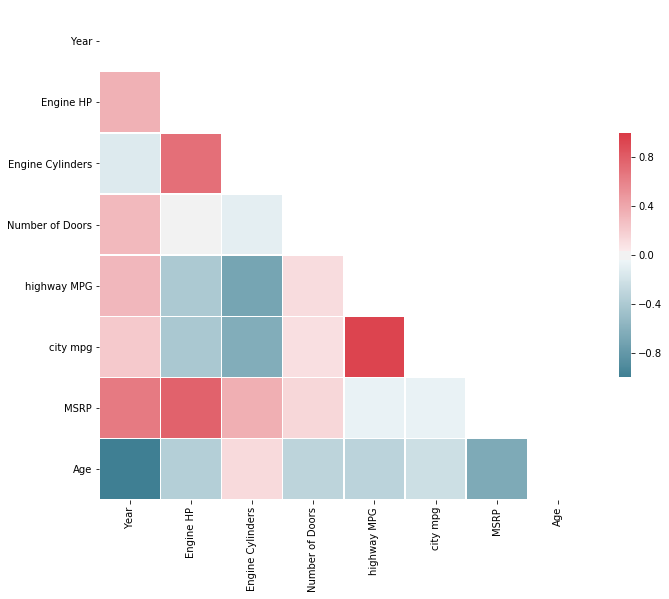

In [86]:
corr=ordinary.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [87]:
#Also showcasing the table below to lookup exact values for reference.
corr

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP,Age
Year,1.000000,0.353140,-0.127073,0.310117,0.313245,0.225444,0.654888,-1.000000
Engine HP,0.353140,1.000000,0.710434,-0.033395,-0.402546,-0.406283,0.777667,-0.353140
Engine Cylinders,-0.127073,0.710434,1.000000,-0.096929,-0.693673,-0.628121,0.361406,0.127073
Number of Doors,0.310117,-0.033395,-0.096929,1.000000,0.121215,0.102297,0.143271,-0.310117
highway MPG,0.313245,-0.402546,-0.693673,0.121215,1.000000,0.939540,-0.063780,-0.313245
city mpg,0.225444,-0.406283,-0.628121,0.102297,0.939540,1.000000,-0.064406,-0.225444
MSRP,0.654888,0.777667,0.361406,0.143271,-0.063780,-0.064406,1.000000,-0.654888
Age,-1.000000,-0.353140,0.127073,-0.310117,-0.313245,-0.225444,-0.654888,1.000000


As we can see above, there is a very strong negative correlation between Year and Age, which makes sense as the Age of the car is a derived feature created using Year. Highway MPG and City MPG have a strong positive correlation with each other. The same is true for Engine HP and Engine Cylinders. Here selection of the features becomes a bit tricky as we need to keep in mind the popular features. We select Engine Cylinders as it more easy to remember. City MPG and Highway MPG are almost equally correlated to MRSP. Hence, we select City MPG. But further research can go into this by creating surveys,etc.

Also, dropping MSRP Mean and MSRP group as they are of no use.

In [88]:
#dropping the features as discussed above
ordinary=ordinary.drop(['Year','Engine HP','highway MPG'],axis=1)
ordinary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
Make                 6950 non-null object
Model                6950 non-null object
Engine Fuel Type     6947 non-null object
Engine Cylinders     6921 non-null float64
Transmission Type    6950 non-null object
Driven_Wheels        6950 non-null object
Number of Doors      6950 non-null float64
Market Category      3967 non-null object
Vehicle Size         6950 non-null object
Vehicle Style        6950 non-null object
city mpg             6950 non-null int64
MSRP                 6950 non-null int64
Age                  6950 non-null int64
dtypes: float64(2), int64(3), object(8)
memory usage: 705.9+ KB


# Data Cleansing
Next, we try to fix the blank values. As, we can see above there are blank values for  Engine Fuel Type,Market Category and Engine Cyliders. Now lets check the Engine Fuel Type first

In [89]:
ordinary[ordinary['Engine Fuel Type'].isnull()]

,Make,Model,Engine Fuel Type,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,city mpg,MSRP,Age
6662,Suzuki,Verona,NaN,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,17,17199,13
6663,Suzuki,Verona,NaN,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,17,20199,13
6664,Suzuki,Verona,NaN,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,17,18499,13


We lookup the values from the other records in the dataset or we check the internet. For eg, we check for Suzuki Verona as below.

In [90]:
ordinary[(ordinary['Model']=='Verona')&(ordinary['Make']=='Suzuki')]

,Make,Model,Engine Fuel Type,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,city mpg,MSRP,Age
6662,Suzuki,Verona,NaN,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,17,17199,13
6663,Suzuki,Verona,NaN,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,17,20199,13
6664,Suzuki,Verona,NaN,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,17,18499,13
6665,Suzuki,Verona,regular unleaded,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,18,19349,12
6666,Suzuki,Verona,regular unleaded,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,18,21049,12
6667,Suzuki,Verona,regular unleaded,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,18,17549,12
6668,Suzuki,Verona,regular unleaded,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,18,20549,12
6669,Suzuki,Verona,regular unleaded,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,17,20299,11
6670,Suzuki,Verona,regular unleaded,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,17,18299,11


In [91]:
#For Suzuki Verona,  Fuel Type is regular unleaded
ordinary.ix[(ordinary['Engine Fuel Type'].isnull())&(ordinary['Model']=='Verona')&(ordinary['Make']=='Suzuki'),'Engine Fuel Type']='regular unleaded'

Now, for engine cylinders, the makes and models having NaN's genuinely have no cylinders, only rotors. We replace the NaN's with zeros.

In [92]:
ordinary.ix[(ordinary['Make']=='Mazda')&(ordinary['Model']=='RX-8'),'Engine Cylinders']=0
ordinary.ix[(ordinary['Make']=='Mazda')&(ordinary['Model']=='RX-7'),'Engine Cylinders']=0
ordinary.ix[(ordinary['Make']=='Mitsubishi')&(ordinary['Model']=='i-MiEV'),'Engine Cylinders']=0
ordinary.ix[(ordinary['Make']=='Chevrolet')&(ordinary['Model']=='Bolt EV'),'Engine Cylinders']=0
ordinary.ix[(ordinary['Make']=='Volkswagen')&(ordinary['Model']=='e-Golf'),'Engine Cylinders']=0

Market Category contains some generic categorical value for the car. The buyer/seller will not be aware of such values in our dataset. Hence, it should not be considered while creating the regression model

In [93]:
ordinary=ordinary.drop('Market Category',axis=1)

# Normality and Outliers
Now, lets check for normality. We can check this by creating histogram of the features. 

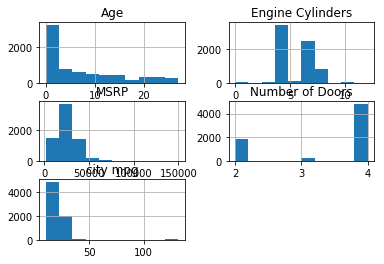

In [94]:
ordinary.hist()
plt.show()

It seems like Age,MSRP and city_mpg have a skewed distribution.Lets have a look at our target variable MSRP

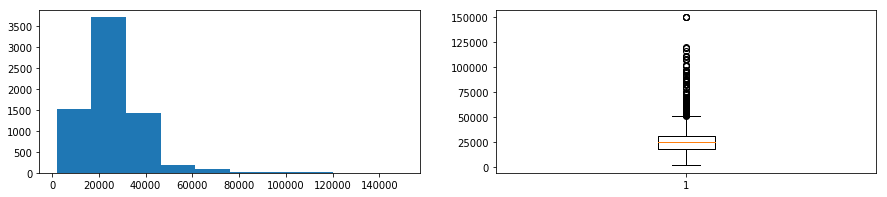

In [95]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,3))
ax1.hist(ordinary['MSRP'])
ax2.boxplot(ordinary['MSRP'])
plt.show()

As we can see above, the price is a positively skewed distribution. We know that one of the assumptions for using LinearRegression is that the variables be normally distributed.

Also,there seem to be some outliers. Lets have a look at them

In [96]:
ordinary[ordinary['MSRP']>140000]

,Make,Model,Engine Fuel Type,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,city mpg,MSRP,Age
3366,Nissan,GT-R,premium unleaded (recommended),6.0,AUTOMATED_MANUAL,all wheel drive,2.0,Midsize,Coupe,16,149990,2
3368,Nissan,GT-R,premium unleaded (required),6.0,AUTOMATED_MANUAL,all wheel drive,2.0,Midsize,Coupe,16,149990,1
3371,Ford,GT,premium unleaded (required),8.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,12,149995,12
3372,Ford,GT,premium unleaded (required),8.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,12,149995,11


When we assigned a grouping based on price, we did so on the basis of Median price per Make.This will work in most of the cases but there may be individual models that can be in a different category. We will remove these outliers before building our models

In [97]:
ordinary=ordinary[ordinary['MSRP']<140000]

Lets log transform the data to handle the skewness

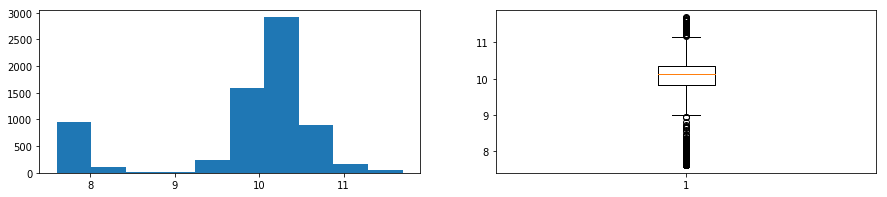

In [98]:
ordinary['log_MSRP']=ordinary['MSRP'].apply(lambda x:np.log(1+x))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,3))
ax1.hist(ordinary['log_MSRP'])
ax2.boxplot(ordinary['log_MSRP'])
plt.show()

Now, lets have a look at Age

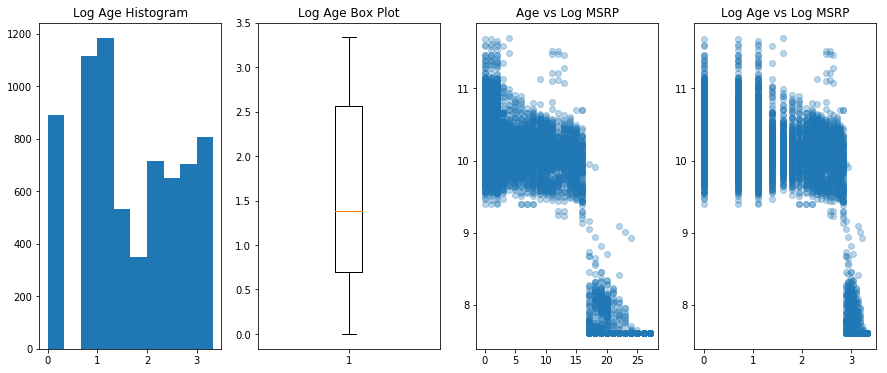

In [99]:
ordinary['log_Age']=ordinary['Age'].apply(lambda x: np.log(x+1))
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,6))
ax1.set_title('Log Age Histogram')
ax1.hist(ordinary['log_Age'])
ax2.boxplot(ordinary['log_Age'])
ax2.set_title('Log Age Box Plot')
ax3.scatter(ordinary['Age'],ordinary['log_MSRP'],alpha=.3)
ax3.set_title('Age vs Log MSRP')
ax4.scatter(ordinary['log_Age'],ordinary['log_MSRP'],alpha=.3)
ax4.set_title('Log Age vs Log MSRP')
plt.show()

It seems Age and Log MSRP have a linear relationship. Now, lets have a look at city mpg

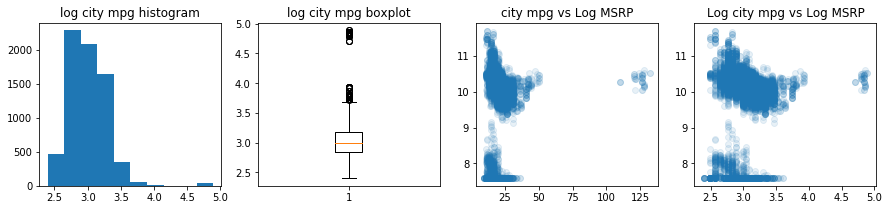

In [100]:
ordinary['log_city mpg']=ordinary['city mpg'].apply(lambda x: np.log(x+1))
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,3))
ax1.hist(ordinary['log_city mpg'])
ax1.set_title('log city mpg histogram')
ax2.boxplot(ordinary['log_city mpg'])
ax2.set_title('log city mpg boxplot')
ax3.scatter(ordinary['city mpg'],ordinary['log_MSRP'],alpha=.1)
ax3.set_title('city mpg vs Log MSRP')
ax4.scatter(ordinary['log_city mpg'],ordinary['log_MSRP'],alpha=.1)
ax4.set_title('Log city mpg vs Log MSRP')
plt.show()

Lets have a look at the correlations to get a better idea

In [101]:
corr=ordinary.corr()
corr['log_MSRP'].sort_values(ascending=True)

Age                -0.835586
log_Age            -0.667081
city mpg            0.051938
log_city mpg        0.057368
Engine Cylinders    0.115009
Number of Doors     0.284750
MSRP                0.866364
log_MSRP            1.000000
Name: log_MSRP, dtype: float64

Age has a stronger correlation with log_MSRP compared to log_Age. For city mpg, we log transform the data as the distribution is close to normal and the correlation is slightly higher. 
So, the numeric features we are going to use are 
- Age
- Engine Cyliners
- log_city mpg
- Number of Doors
<br>
<br>Lets drop the other numeric_features

In [102]:
ordinary=ordinary.drop(['log_Age','city mpg'],axis=1)

Now lets have a look at the categorical features

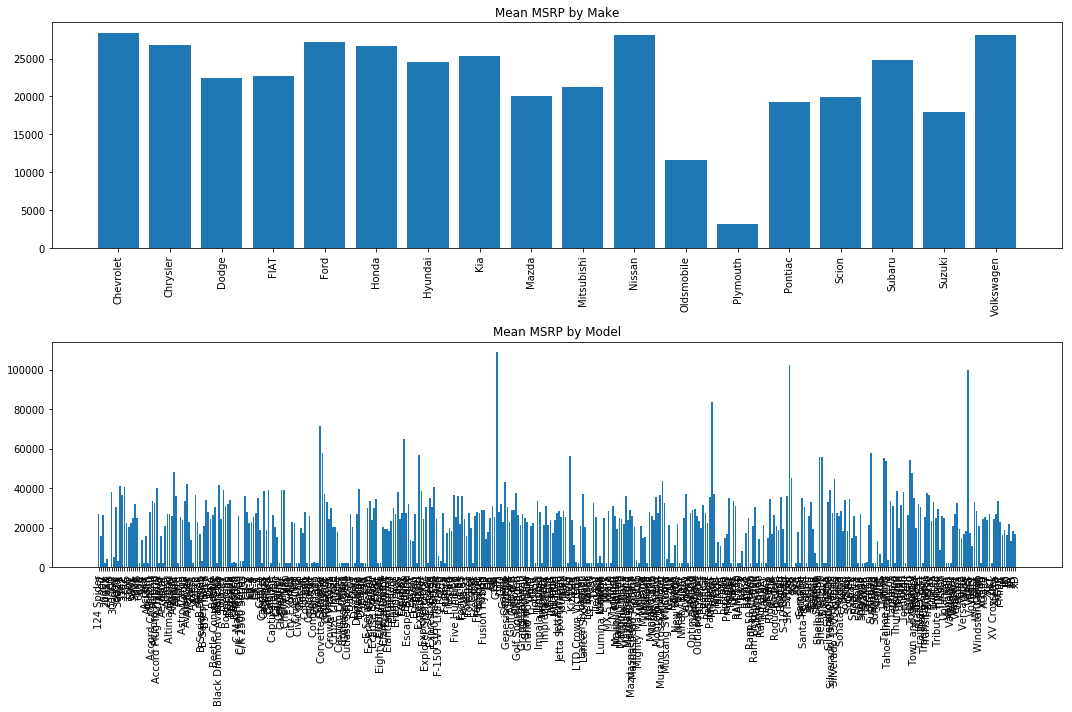

In [103]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
Make=ordinary.groupby(['Make'])['MSRP'].mean()
Model=ordinary.groupby(['Model'])['MSRP'].mean()
FuelType=ordinary.groupby(['Engine Fuel Type'])['MSRP'].mean()
Transmission=ordinary.groupby(['Transmission Type'])['MSRP'].mean()
DrivenWheels=ordinary.groupby(['Driven_Wheels'])['MSRP'].mean()
VehicleSize=ordinary.groupby(['Vehicle Size'])['MSRP'].mean()
VehicleStyle=ordinary.groupby(['Vehicle Style'])['MSRP'].mean()
ax1.bar(Make.index,Make.values)
ax1.set_title('Mean MSRP by Make')
plt.sca(ax1)
plt.xticks(rotation=90)

ax2.bar(Model.index,Model.values)
ax2.set_title('Mean MSRP by Model')
plt.sca(ax2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

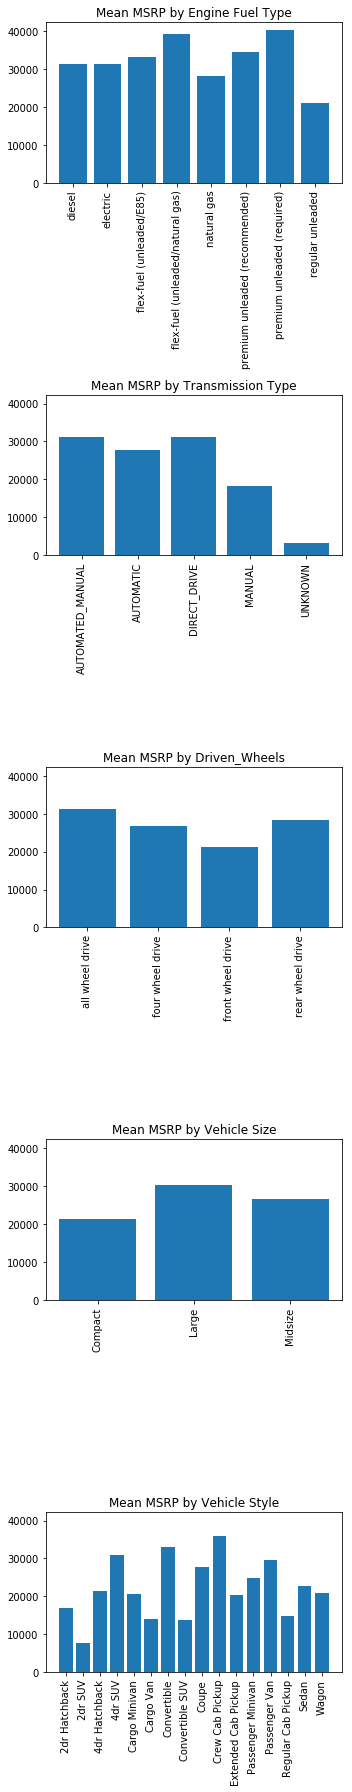

In [104]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5,ncols=1,figsize=(5,25),sharey=True)
ax1.bar(FuelType.index,FuelType.values)
ax1.set_title('Mean MSRP by Engine Fuel Type')
plt.sca(ax1)
plt.xticks(rotation=90)

ax2.bar(Transmission.index,Transmission.values)
ax2.set_title('Mean MSRP by Transmission Type')
plt.sca(ax2)
plt.xticks(rotation=90)

ax3.bar(DrivenWheels.index,DrivenWheels.values)
ax3.set_title('Mean MSRP by Driven_Wheels')
plt.sca(ax3)
plt.xticks(rotation=90)

ax4.bar(VehicleSize.index,VehicleSize.values)
ax4.set_title('Mean MSRP by Vehicle Size')
plt.sca(ax4)
plt.xticks(rotation=90)

ax5.bar(VehicleStyle.index,VehicleStyle.values)
ax5.set_title('Mean MSRP by Vehicle Style')
plt.sca(ax5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

As we see above the MSRP varies for different values of the features. Hence, we shall keep the above features and one hot encode the same.
For model, we can see that there are a number of models. Hence, one-hot encoding the same will result into a huge number of features. So, we can either eliminate this features or use some dimensionality reduction techniques such as PCA before fitting the data to a model. First lets try without the model.

In [105]:
#Engine Fuel Type
one_hot_fuel_type = pd.get_dummies(ordinary['Engine Fuel Type'])
ordinary = ordinary.drop('Engine Fuel Type', axis=1)
ordinary = ordinary.join(one_hot_fuel_type)
#Transmission Type
one_hot_transmission = pd.get_dummies(ordinary['Transmission Type'])
ordinary = ordinary.drop('Transmission Type', axis=1)
ordinary = ordinary.join(one_hot_transmission)
#Driven_Wheels
one_hot_driven_wheels = pd.get_dummies(ordinary['Driven_Wheels'])
ordinary = ordinary.drop('Driven_Wheels', axis=1)
ordinary = ordinary.join(one_hot_driven_wheels)
#Vehicle Size
one_hot_vehicle_size = pd.get_dummies(ordinary['Vehicle Size'])
ordinary = ordinary.drop('Vehicle Size', axis=1)
ordinary = ordinary.join(one_hot_vehicle_size)
#Vehicle Style
one_hot_vehicle_style = pd.get_dummies(ordinary['Vehicle Style'])
ordinary = ordinary.drop('Vehicle Style', axis=1)
ordinary = ordinary.join(one_hot_vehicle_style)
#Make
one_hot_make = pd.get_dummies(ordinary['Make'])
ordinary = ordinary.drop('Make', axis=1)
ordinary = ordinary.join(one_hot_make)

In [106]:
ordinary=ordinary.drop(['Model'],axis=1)

Saving the transformed dataframe as a pickle file

In [116]:
import pickle
ordinary_trans='ord_transformed.pkl'
with open(ordinary_trans, "wb") as f:
    w = pickle.dump(ordinary,f)

In [108]:
train_set,test_set = train_test_split(ordinary,test_size=0.2,random_state=42)
train_X = train_set.copy()
train_Y = train_set["log_MSRP"].copy()
train_X = train_X.drop("log_MSRP", axis=1) # drop labels for training set

In [109]:
test_X = test_set.copy()
test_Y = test_set["log_MSRP"].copy()
test_X = test_X.drop("log_MSRP", axis=1) # drop labels for test set

In [111]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [112]:
from sklearn.metrics import mean_squared_error
carSales_predictions = lin_reg.predict(test_X)
lin_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
lin_rmse = np.sqrt(lin_mse)
lin_rmse

22078.264421937263

In [113]:
from sklearn.metrics import r2_score
r2=r2_score(np.exp(test_Y), np.exp(carSales_predictions))
r2

-1.5181225049904734

In [114]:
(n,p)=test_X.shape
Adjusted_R=1-(((1-r2)*(n-1))/(n-p-1))
Adjusted_R

-1.6298286913020807